# Homework 3

- Phanthat Likitbantoon 63340500040
- Phufa Boonchuatrong 63340500048

## CHAPTER 1 

In [148]:
import numpy as np
import matplotlib.pyplot as plt

In [149]:
# data
x = np.array([1,3,2,8,6,7,-3,-2,-7])
y = np.array([2,3,2,8,6,7,-3,-4,-7])

# reformat data
def reformat_data(x,y):
    data = []
    for i in range(len(x)):
        data.append(np.array([x[i],y[i]]))

    return np.array(data)

data = reformat_data(x,y)


In [150]:
def posteriors(data, mean, variance, prior=1):
        sd = np.sqrt(variance)
        p = (1/((np.sqrt(2*np.pi))*sd))*(np.exp(-((data-mean)**2)/(2*sd**2)))
        return p*prior

def plot_likelihood_distributions(data, mean, cov, w_nj):
    # create figure 
    fig = plt.figure(figsize=(10, 5)) 
    
    # setting values to rows and column variables 
    rows = 1
    columns = 2

    x_axis = np.arange(-10, 10, 0.01) 
    # y_axis = []
    for fea in range(data.shape[1]):

        fig.add_subplot(rows, columns, fea+1)

        y_axis = []
        for k in range(len(mean)):
            y_axis.append([posteriors(i,mean[k][fea],cov[k][fea][fea], w_nj[0]) for i in x_axis])
            y = ([posteriors(i,mean[k][fea],cov[k][fea][fea], w_nj[0]) for i in x_axis])
     
            # for i in range(len(y1)):
            #     y_all.append(y1[i]+y2[i]+y3[i])

            plt.plot(x_axis, y, label=f"latent {fea+1}") 
            plt.title(f"feature {fea+1}")
        y_all = np.sum(np.array(y_axis), axis=0)
        plt.plot(x_axis, y_all, '--', label='Mixture')

        
    plt.legend()
    
    # plt.show() 

In [151]:
def Multivariate_Gaussian(mean,cov,data): # already check
    # print(mean)
    # print(cov)
    # print(data)
    n = len(data)
    # mean = np.array([mean]).T #(1,2) -> (2,1)
    # data = np.array([data]).T

    '''
        Another way to calculate  
        -> (2*np.pi)**(-n/2) * (np.linalg.det(cov) ** (-1/2) ) * np.exp(-1/2*((data-mean).T@np.linalg.inv(cov)@(data-mean)))
    '''

    temp = (data-mean).T@np.linalg.inv(cov)@(data-mean)

    return (1/np.sqrt(np.linalg.det(cov)*(2*np.pi)**n))*np.exp(-0.5*temp)

def Estimation_Maximization(iter, mean_i, cov_i, weight_i, data):

    # Initialize
    mean = mean_i
    cov = cov_i
    weight = weight_i

    reg_cov = 1e-6*np.identity(len(data[0]))
    log_likelihoods = []

    for _ in range(iter):

        p_sum = 0
        for j in range(len(weight)):
            for n in range(len(data)):
            #generalized Gaussian
                p_sum += Multivariate_Gaussian(mean[j],cov[j],data[n]) * weight[j]
        
        '''
            Expectation
            -> estimate latent variable 
            -> sum prob in all latent should be 1
        
        '''
        k_all = []
        for j in range(len(weight)):
            
            w = []
            for n in range(len(data)):
                k = Multivariate_Gaussian(mean[j],cov[j],data[n])
                w.append((k * weight[j])/p_sum)
            k_all.append(w)
        
        w_nj = [np.sum(k_all[i]) for i in range(len(k_all))]
        print(k_all)
        # print(len(w_nj))
        # print(k_all[0])
        # print(k_all[1])
        # print(k_all[2])
        # print('w_nj : ', w_nj)
        # print('sum_w_nj : ', np.sum([np.sum(k_all[i]) for i in range(len(k_all))]))

        
        # Maximization
        ## Update weight
        new_weight = np.sum(k_all, axis= 1)/data.shape[0]


        ## Update mean
        new_mean = []
        for j in range(len(k_all)):
            temp1 = 0
            for n in range(len(data)):
                temp1 += k_all[j][n] * np.array(data[n])

            temp2 = np.sum(k_all[j])
            new_mean.append(temp1/temp2)


        ## Update covariance
        new_cov = []
        for j in range(len(k_all)):
            temp1 = 0
            for n in range(len(data)):
                m = np.array([new_mean[j]]).T
                d = np.array([data[n]]).T

                temp1 += k_all[j][n] * (d-m) @ ((d-m).T) + reg_cov

            temp2 = np.sum(k_all[j])
            c = (temp1/temp2)
            # dia_mat = np.zeros(c.shape)
            # for i in range(c.shape[0]):
            #     dia_mat[i][i] = c[i][i]
            # print(dia_mat)    
            new_cov.append(c)

        # log likelihoods
        # log_likelihoods.append(np.log(np.sum([k*Multivariate_Gaussian(np.array([new_mean[i]]).T, new_cov[j], data.T) for k,i,j in zip(new_weight,range(len(new_mean)),range(len(new_cov)))])))

        lls = 0
        for n in range(data.shape[0]):
            ll = 0
            for j in range(len(new_mean)):
                ll += Multivariate_Gaussian(new_mean[j].T, new_cov[j], data[n]) * new_weight[j]
            lls += np.log(ll)
        log_likelihoods.append(lls)
        
        mean = new_mean
        cov = new_cov
        weight = new_weight

        plot_likelihood_distributions(data = data, mean = new_mean, cov=new_cov, w_nj=w_nj)
        plt.show()

        print('mean : ', np.array(new_mean))
        print('cov : ', np.array(new_cov))
        print('weight : ', np.array(new_weight))

    print('log likelihood : ', log_likelihoods)
    
    return np.array(new_mean), np.array(new_cov), np.array(new_weight), w_nj, log_likelihoods

In [152]:
numOfClusters, n = 3, 9
means = np.zeros((numOfClusters, n))

1. Using 3 mixtures to initialize Gussian

In [153]:
# Initialize
mean_i = np.array([[3,3], [2,2], [-3,-3]])
cov_i = np.array([np.identity(2)]*3)
weight_i = np.array([1/3,1/3,1/3])

# print(mean_i)
# print(cov_i)
# print(weight_i)

[[0.017128240560059883, 0.2086646871804058, 0.07676344851214151, 2.8979234621617532e-12, 2.5751268164742156e-05, 2.3482117029586512e-08, 4.8400250578058394e-17, 1.7805457135213897e-17, 7.762484898237306e-45], [0.12656153037426182, 0.07676344851214151, 0.2086646871804058, 4.8400250578058394e-17, 2.3482117029586512e-08, 2.8979234621617532e-12, 2.8979234621617532e-12, 1.0660864638176772e-12, 1.3854661658293868e-36], [2.608627567922773e-10, 4.8400250578058394e-17, 2.8979234621617532e-12, 5.885951081163797e-54, 1.3854661658293868e-36, 7.762484898237306e-45, 0.2086646871804058, 0.07676344851214151, 2.3482117029586512e-08]]


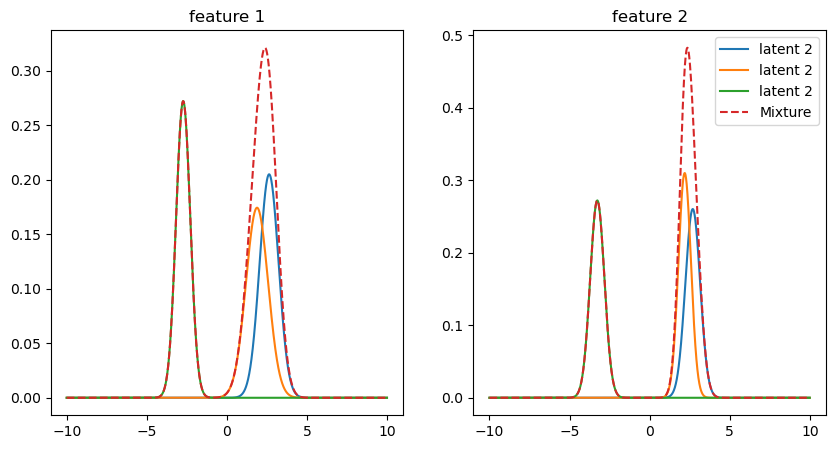

mean :  [[ 2.63334724  2.68995415]
 [ 1.87912807  2.18632394]
 [-2.73105893 -3.26894172]]
cov :  [[[ 0.34648489  0.25399641]
  [ 0.25399641  0.21496998]]

 [[ 0.47893232  0.20884596]
  [ 0.20884596  0.15162986]]

 [[ 0.19664496 -0.19661059]
  [-0.19661059  0.19664462]]]
weight :  [0.03362024 0.04577663 0.03171424]
[[8.13539415930276e-06, 0.026801515264368872, 0.007754295957337863, 1.541327182076447e-34, 1.1767129134132736e-14, 1.9666526339648192e-23, 1.8327705859368392e-40, 1.6427936793574843e-97, 1.7455867104138704e-112], [0.008665560086652285, 0.0030149316627293633, 0.01644069920830812, 9.642958278548588e-55, 1.3951078671128026e-24, 4.5513210887998686e-38, 1.2225910403971305e-46, 1.4561342301936003e-81, 2.57126117878414e-139], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7161712737270471, 0.22114358869938522, 0.0]]


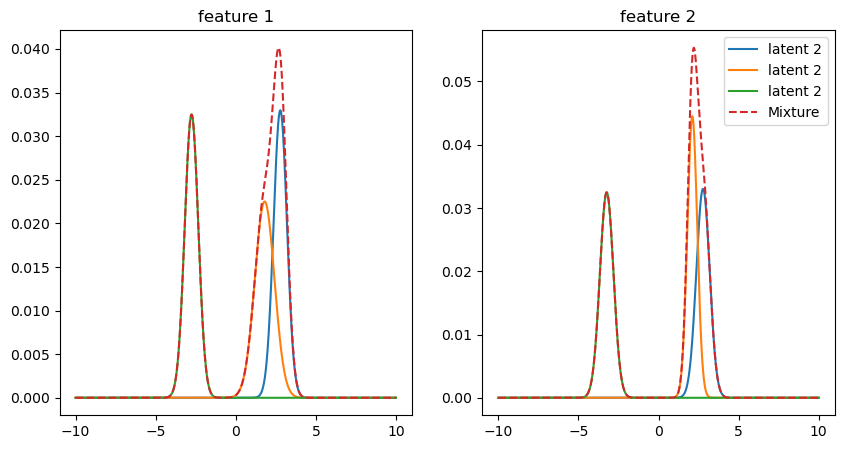

mean :  [[ 2.77518289  2.77541826]
 [ 1.79906155  2.10721209]
 [-2.76406691 -3.23593309]]
cov :  [[[ 0.17500551  0.1743273 ]
  [ 0.1743273   0.17440517]]

 [[ 0.37530641  0.12875512]
  [ 0.12875512  0.0960377 ]]

 [[ 0.18027827 -0.18026867]
  [-0.18026867  0.18027827]]]
weight :  [0.00384044 0.00312458 0.1041461 ]
[[5.3394638062622334e-291, 0.004870003569085436, 0.0010039826451976699, 5.7892764697687405e-37, 6.358729602609671e-16, 3.373867341528425e-25, 1.6549713427682097e-44, 0.0, 5.857839464389706e-122], [0.00012305936756955773, 5.942220573317932e-06, 0.0002648050440790614, 9.269843853067553e-86, 1.5930182231372238e-39, 2.9515232739410625e-60, 1.2759238372096102e-67, 4.0568747663759393e-109, 3.782307535535819e-204], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8071765782961587, 0.18655562885733556, 0.0]]


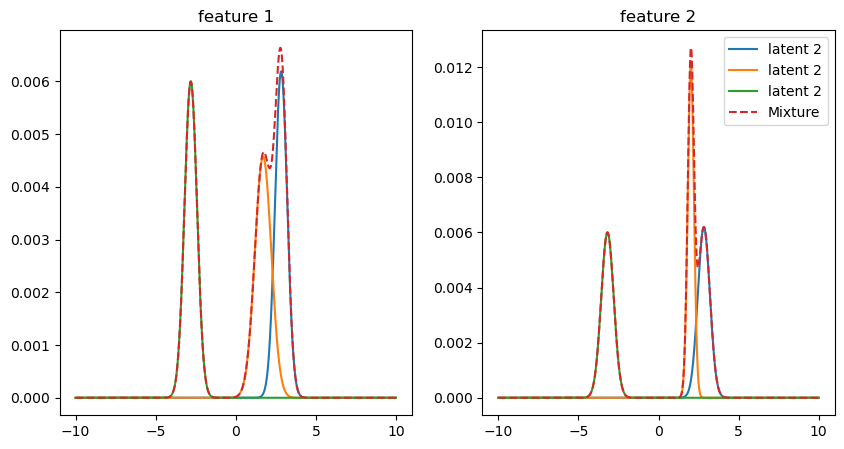

mean :  [[ 2.82907984  2.82907984]
 [ 1.7026024   2.01508918]
 [-2.8122677  -3.1877323 ]]
cov :  [[[ 0.14323864  0.14170646]
  [ 0.14170646  0.14323864]]

 [[ 0.26198449  0.01957667]
  [ 0.01957667  0.03771536]]

 [[ 0.15249794 -0.15248888]
  [-0.15248888  0.15249794]]]
weight :  [6.52665135e-04 4.37562925e-05 1.10414690e-01]
log likelihood :  [-429.1450373446056, -456.5951081480418, -571.5110334223871]


In [154]:
mean_i, cov_i, weight_i, temp, log_likelihoods  = Estimation_Maximization(3, mean_i,cov_i,weight_i,data)


2. Plot the log likelihood of the model

In [155]:
def plot_log_likelihoods(log_likelihoods):
    fig = plt.figure(figsize=(5,5))
    ax1 = fig.add_subplot(111) 
    ax1.set_title('Log-Likelihood')
    ax1.plot(range(1,len(log_likelihoods)+1,1),log_likelihoods)
    
    plt.show()


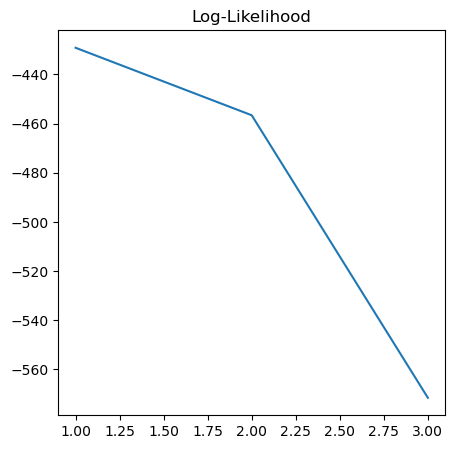

In [156]:
plot_log_likelihoods(log_likelihoods = log_likelihoods)

Does it goes up every iteration just as we learned in class?

Ans -> the graph 2 Gaussian mixture does not goes up because there are too few iterations. causing the data to be unable to converge

3. Using 2 mixtures to initialize Gaussian 

In [157]:
mean_i = np.array([[3,3], [-3,-3]])
cov_i = np.array([np.identity(2)]*2)
weight_i = np.array([1/2, 1/2])

[[0.029129150043509213, 0.3548656944854763, 0.1305477933782328, 4.928354844615767e-12, 4.3793905833536116e-05, 3.99348729307943e-08, 8.231190800293019e-17, 3.0280858717873124e-17, 1.3201273447693702e-44], [4.4363636514334024e-10, 8.231190800293019e-17, 4.928354844615767e-12, 1.0009945364252643e-53, 2.3561936605885996e-36, 1.3201273447693702e-44, 0.3548656944854763, 0.1305477933782328, 3.99348729307943e-08]]


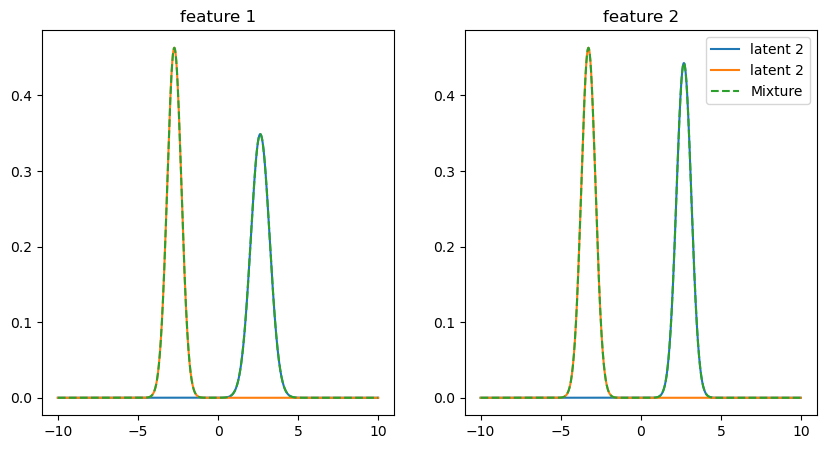

mean :  [[ 2.63334724  2.68995415]
 [-2.73105893 -3.26894172]]
cov :  [[[ 0.34647264  0.25399641]
  [ 0.25399641  0.21495773]]

 [[ 0.19663197 -0.19661059]
  [-0.19661059  0.19663163]]]
weight :  [0.05717627 0.05393484]
[[6.619235184199372e-06, 0.0218896960748407, 0.006330288499639966, 1.2384340621287907e-34, 9.552327920264838e-15, 1.5893003846374327e-23, 1.465191448140729e-40, 1.2009867559835644e-97, 1.341941209897957e-112], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.7425066989749675, 0.22926669721535814, 0.0]]


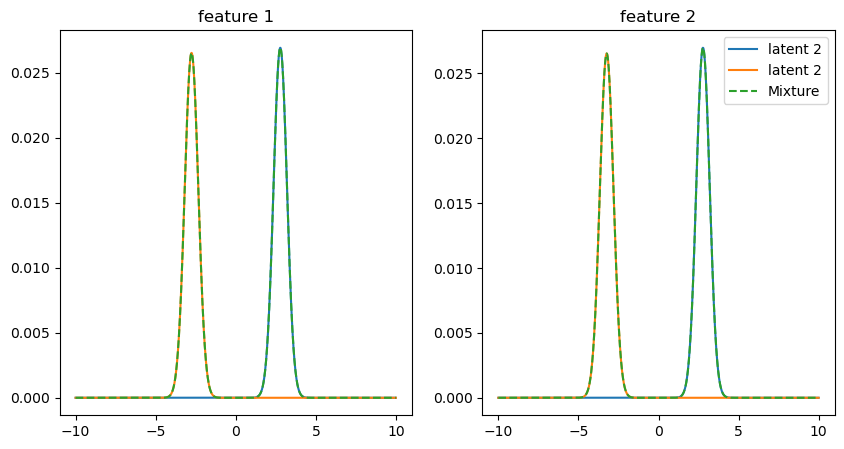

mean :  [[ 2.77526425  2.77549875]
 [-2.76407391 -3.23592609]]
cov :  [[[ 0.17501745  0.17428229]
  [ 0.17428229  0.17441928]]

 [[ 0.18027423 -0.18026497]
  [-0.18026497  0.18027423]]]
weight :  [0.00313629 0.10797482]
[[4.591686029938056e-253, 0.0035152937379392935, 0.0007244224110948158, 4.1881507167563895e-37, 4.595741961440845e-16, 2.439580969720225e-25, 1.1922164990665708e-44, 0.0, 4.2159949993506424e-122], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8088345827402896, 0.1869257011106757, 0.0]]


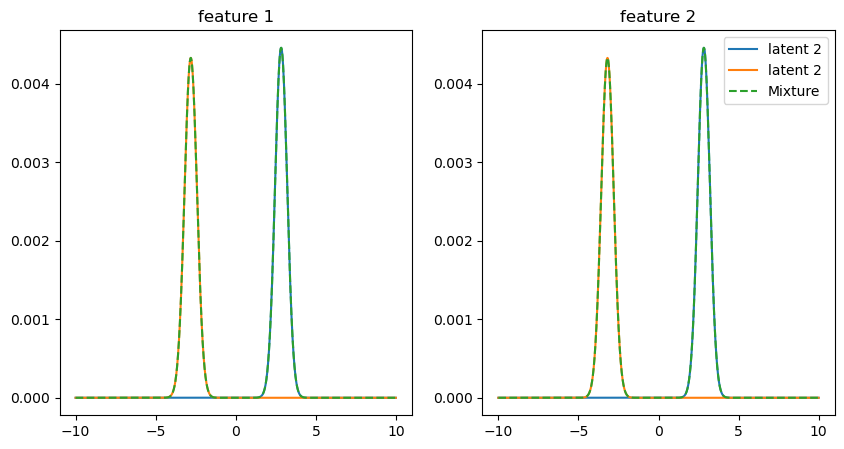

mean :  [[ 2.82913422  2.82913422]
 [-2.81227841 -3.18772159]]
cov :  [[[ 0.14379345  0.14167067]
  [ 0.14167067  0.14379345]]

 [[ 0.15249123 -0.15248219]
  [-0.15248219  0.15249123]]]
weight :  [0.00047108 0.11064003]
[[4.178697009769894e-58, 0.0002576767922836414, 2.568089769896978e-05, 5.991247368854574e-45, 1.44250453927258e-19, 9.765174441898575e-31, 5.772993917659391e-56, 1.4932839355439097e-260, 2.9769636116732612e-151], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8854848539355986, 0.11423178837441889, 0.0]]


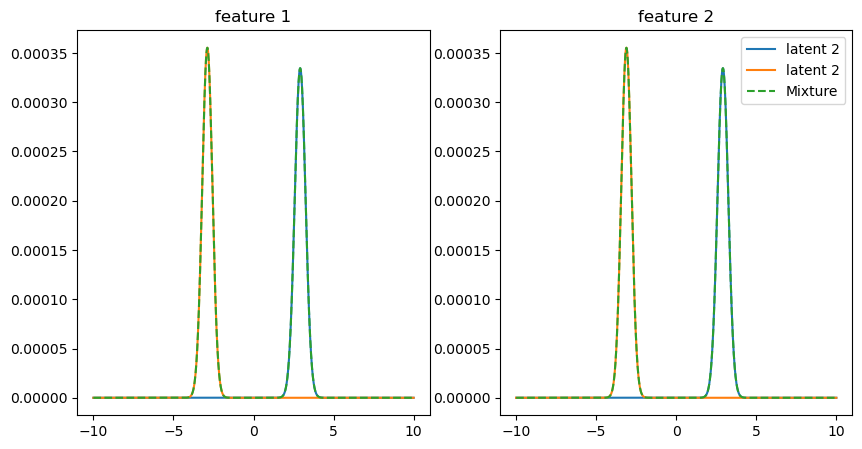

mean :  [[ 2.90936933  2.90936933]
 [-2.88573583 -3.11426417]]
cov :  [[[ 0.11417873  0.08241675]
  [ 0.08241675  0.11417873]]

 [[ 0.10121687 -0.10120787]
  [-0.10120787  0.10121687]]]
weight :  [3.14841878e-05 1.11079627e-01]
[[7.893129743561814e-14, 4.846113802816681e-06, 7.528997957862405e-08, 2.860072303560722e-63, 4.003532877691889e-27, 5.4762949459634434e-43, 3.640460226846094e-83, 7.722310722789271e-97, 6.0524761763387446e-223], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9783513507052314, 0.021643727890907346, 0.0]]


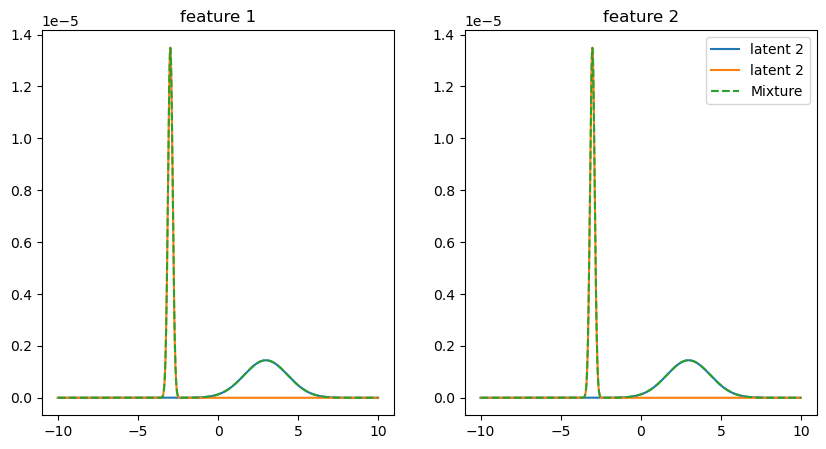

mean :  [[ 2.98470149  2.98470151]
 [-2.97835617 -3.02164383]]
cov :  [[[ 1.84381098  0.01506446]
  [ 0.01506446  1.84381093]]

 [[ 0.02118438 -0.02117538]
  [-0.02117538  0.02118438]]]
weight :  [5.46822651e-07 1.11110564e-01]
log likelihood :  [-432.20002749743566, -1030.33814343691, -692.8466353251015, -853.6784791631051, -216.55131269607793]


In [158]:
mean_i, cov_i, weight_i, temp, log_likelihoods  = Estimation_Maximization(iter=5, mean_i=mean_i, cov_i=cov_i,weight_i=weight_i,data=data)

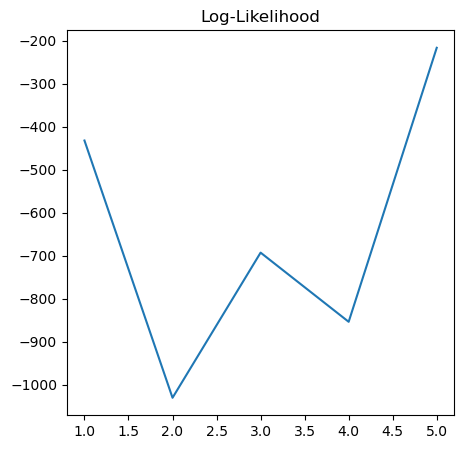

In [159]:
plot_log_likelihoods(log_likelihoods = log_likelihoods)

Ans -> 2 mixtures gaussian is better than 3 mixtures gaussian because after the loop 2 mixtures gaussian have a higher log-likelihood so the 2-mixture model is a better fit for the given data indicate that the 2 mixtures gaussian converge to optimal point as the log likelihood goes up.

## CHAPTER 2

In [160]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [161]:
data = scipy.io.loadmat("facedata.mat")

Data shape :  (40, 10)
[[48 46 50 ... 50 54 53]
 [47 47 48 ... 37 46 50]
 [46 48 43 ... 33 41 51]
 ...
 [49 49 50 ... 45 46 47]
 [48 48 49 ... 45 46 46]
 [51 48 50 ... 45 45 46]]
(56, 46)


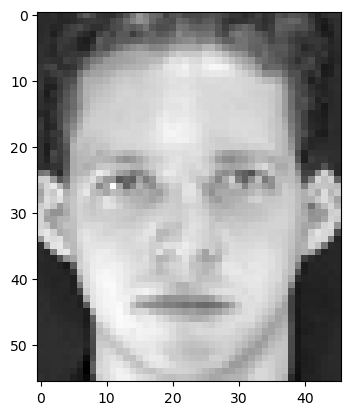

In [162]:
# face data is a 2-dimensional array with size 40x10
print('Data shape : ', data['facedata'].shape)
# Each data is indexed by i and j
# where i is the person index, j is the index of the pose
# In other words, there are 40 people each person have 10 images in the database.

print(data['facedata'][0,0])
# Each image is a 56 by 46 image
print(data['facedata'][0,0].shape)
# You can see the image by using the imshow in matplotlib

plt.imshow(data['facedata'][0,0],cmap="gray")
plt.show()

Convert pixel data scales from 0-255 to 0-1 

In [163]:
# data['facedata']

In [164]:
from skimage import img_as_float

xf = {}
for i in range(data['facedata'].shape[0]):
    for j in range(data['facedata'].shape[1]):
        xf[i,j] = img_as_float(data['facedata'][i,j])
print(xf[0,0])

[[0.18823529 0.18039216 0.19607843 ... 0.19607843 0.21176471 0.20784314]
 [0.18431373 0.18431373 0.18823529 ... 0.14509804 0.18039216 0.19607843]
 [0.18039216 0.18823529 0.16862745 ... 0.12941176 0.16078431 0.2       ]
 ...
 [0.19215686 0.19215686 0.19607843 ... 0.17647059 0.18039216 0.18431373]
 [0.18823529 0.18823529 0.19215686 ... 0.17647059 0.18039216 0.18039216]
 [0.2        0.18823529 0.19607843 ... 0.17647059 0.17647059 0.18039216]]


In [165]:
# xf

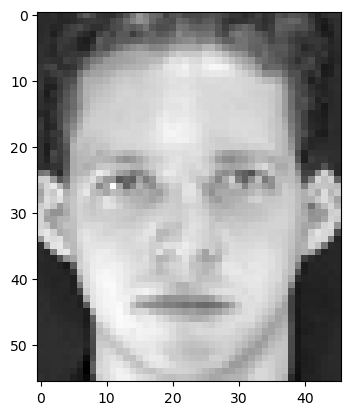

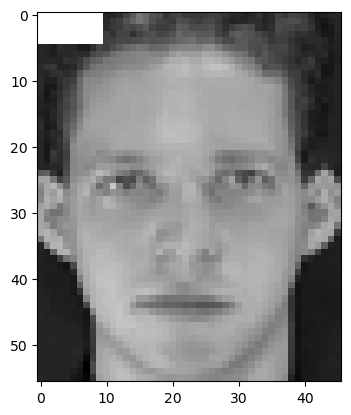

In [166]:
plt.imshow(xf[0,0],cmap="gray")
plt.show()
x_temp = xf[0,0].copy()
x_temp[0:5,0:10] = 1
# In float format, 1 is white
plt.imshow(x_temp,cmap="gray")
plt.show()

In [167]:
def Euclidean_dis(x ,y):
    return np.sqrt(np.sum((x-y)**2))

1. What is the Euclidean distance between xf[0,0] and xf[0,1]? What is the Euclidean distance
between xf[0,0] and xf[1,0]?

In [168]:
eu_dis_1 = Euclidean_dis(xf[0,0], xf[0,1])
eu_dis_2 = Euclidean_dis(xf[0,0], xf[1,0])

print(f'Euclidean distance between xf[0,0] and xf[0,1] = {eu_dis_1}')
print(f'Euclidean distance between xf[0,0] and xf[1,0] = {eu_dis_2}')


Euclidean distance between xf[0,0] and xf[0,1] = 10.037616294165492
Euclidean distance between xf[0,0] and xf[1,0] = 8.173295099737281


##### Does the numbers make sense?
<b> Ans </b> -> The Number of Euclidean distances doesn't make sense. Generally, a lower distance indicates higher similarity. But the Euclidean distance between xf[0,0] and xf[0,1], which are pictures of the same person, is greater than the Euclidean distance between xf[0,0] and xf[1,0], which are pictures of different people.

##### Do you think these numbers will be useful for face verification?
Ans -> These numbers can be useful for face verification. Lower distances indeed indicate higher similarity. However, relying on a single image for verification may not be accurate enough. A better solution is to use multiple images for face verification.


2. Write a function that takes in a set of feature vectors T and a set of feature vectors D, and
then output the similarity matrix A.

In [169]:
T = {}
D = {}
for person_num, img_num in xf:
    # print(person_num, img_num)
    if img_num < 3:
        T[person_num, img_num] = xf[person_num, img_num]
    else:
        D[person_num, img_num] = xf[person_num, img_num]
# xf.keys()

print(f'train length : {len(T)}')
print(f'test length : {len(D)}')

train length : 120
test length : 280


In [170]:
# for k, v in T.items():
#     print(k, v)

3. Write a function that takes in the similarity matrix created from the previous part

In [171]:
def Similarity_matrix(train, test):
    sim_mat = []
    
    for i in range(train.shape[0]):
        row = []
        for j in range(test.shape[0]):
            row.append(np.linalg.norm(train[i] - test[j]))
        sim_mat.append(row)

    return sim_mat

In [172]:
def predict(sim, threshold, person=40, number_of_images_per_class = 3):
    tp = tn = fp = fn = 0
    for i in range(person):
        batch = sim[(i*number_of_images_per_class):(i*number_of_images_per_class)+number_of_images_per_class]
        if batch:
            for j in range(len(batch[0])):
                Score = [batch[0][j],batch[1][j],batch[2][j]]
                Class = any(value < threshold for value in Score)
                if i == (j//7):
                    if Class:
                        tp+=1
                    else:
                        fn+=1
                else:
                    if Class:
                        fp+=1
                    else:
                        tn+=1
    tpr = tp / (tp+fn)
    fpr = fp / (fp+tn)
    return tpr, fpr
    


In [173]:
x = np.array(list(T.values()))
y = np.array(list(D.values()))
x.shape

(120, 56, 46)

In [174]:
x_reshape = np.reshape(x,(x.shape[0],-1))
y_reshape = np.reshape(y,(y.shape[0],-1))


In [175]:
sim = Similarity_matrix(x_reshape, y_reshape)
tpr, fpr = predict(sim, threshold=10, person=40, number_of_images_per_class = 3)
print(f'True positive rate {tpr}')
print(f'False positive rate {fpr}')


True positive rate 0.9964285714285714
False positive rate 0.4564102564102564


4.Plot the RoC curve

In [176]:
def generate_roc_curve(sim_matrix, min_thres, max_thres):
    TP = []
    FP = []
    thresholds = np.linspace(min_thres, max_thres, 1000)
    for threshold in thresholds:
        tpr, fpr  = predict(sim_matrix, threshold=threshold, person=40, number_of_images_per_class = 3)

        TP.append(tpr)
        FP.append(fpr)
        
    return TP, FP

In [177]:
min_thres = np.min(np.min(np.array(sim),axis = 0))
max_thres = np.max(np.max(np.array(sim),axis = 0))
print(min_thres, max_thres)

1.742015342878778 17.541726165424688


In [178]:
tpr_ori, fpr_ori = generate_roc_curve(sim, min_thres = min_thres, max_thres = max_thres)

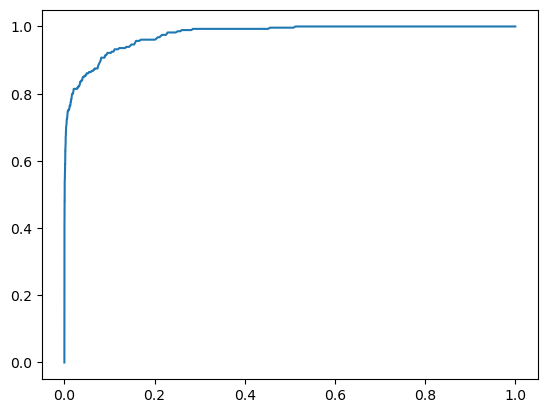

In [179]:
plt.plot(fpr_ori, tpr_ori)

Ans-> The minimum threshold is set to 0, and the maximum threshold is set to 15

Principle Component Analysis (PCA)

5. Compute the mean vector from the training images. (meanface)

Calculate meanface

In [180]:
mean_face = np.mean(x, axis=0)
mean_face.shape

(56, 46)

Text(0.5, 1.0, 'meanface')

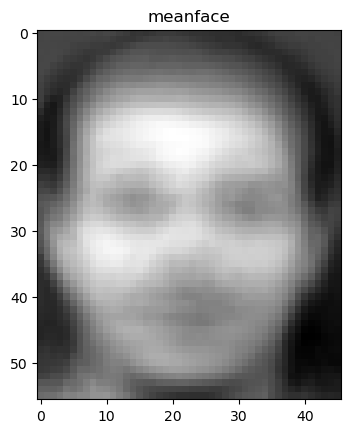

In [181]:
plt.imshow(mean_face,cmap="gray")
plt.title('meanface')

Subtract from meanface

In [182]:
# x_hat = x - mean_face
# x_hat.shape

In [183]:
x_hat = np.zeros(x.shape)
for d in range(x.shape[0]):
    x_hat[d] = x[d] - mean_face
    
x_hat.shape

(120, 56, 46)

In [184]:
x_hat_reshape = np.reshape(x_hat, (x_hat.shape[0],-1))
print(x_hat_reshape.shape)

(120, 2576)


6. What is the size of the covariance matrix? What is the rank of the covariance matrix?

Ana -> The size of covariance matrix is feature x feature. So, it should be 2576 x 2576
The rank of covariance matrix is N-1. So, it should be 120-1 = 119


7. Gram matrix

In [185]:
gram_matrix = np.dot(x_hat_reshape, x_hat_reshape.T) # or use @
gram_matrix.shape

(120, 120)

What is the size of the Gram matrix?

In [186]:
print(f'size of gram matrix : {gram_matrix.shape}')

size of gram matrix : (120, 120)


Ans-> The size of gram matrix is N_sample x N_sample. So, it should be 120 x 120

What is the rank of Gram matrix?

In [187]:
# when training data < feature dimension rank should be (training data - 1)
print(f' Rank of gram matrix should be : {len(x)-1}')

 Rank of gram matrix should be : 119


Ans-> The rank of gram matrix is N-1. So, it should be 120-1 = 119

How many non- zero eigenvalues

Ans-> We expect to get non-zero eigenvalues = rank of gram matrix (119)

In [188]:
def Non_zero_eigenvalue(eigenvalues, eigenvectors, threshold = 1e-6):
    eig_val = []
    eig_vec = []
    for i in range(eigenvalues.shape[0]):
        if eigenvalues[i] > threshold:
            eig_val.append(eigenvalues[i])
            eig_vec.append(eigenvectors[i])
        else:
            eig_val.append(0)
            eig_vec.append(eigenvectors[i])

    non_zero = [1 if i > threshold else 0 for i in eig_val]
    print(sum(non_zero), eig_val)
    return np.array(eig_val), np.array(eig_vec)

8. Is the Gram matrix also symmetric? Why?

In [189]:
is_symmetric_matrix = np.array_equal(gram_matrix, gram_matrix.T)
is_symmetric_matrix

True

the Gram matrix and its transpose are identical which confirms its symmetry.

9. Compute the eigenvectors and eigenvalues of the Gram matrix

In [190]:
eigenvalues_gram, eigenvectors_gram = np.linalg.eigh(gram_matrix)


In [191]:
eigenvectors_gram

array([[-0.09128709,  0.01171851, -0.03284951, ...,  0.16838572,
        -0.08144841,  0.07820028],
       [-0.09128709,  0.00347436, -0.00712131, ...,  0.00607299,
        -0.06891888,  0.15633363],
       [-0.09128709,  0.01301747,  0.03802993, ...,  0.08922514,
        -0.04460943,  0.14076739],
       ...,
       [-0.09128709,  0.00197116, -0.01356318, ..., -0.13635891,
        -0.08254825,  0.03542524],
       [-0.09128709, -0.02639082, -0.03108812, ..., -0.06627051,
        -0.11167625,  0.04815903],
       [-0.09128709,  0.01616482,  0.02085834, ..., -0.07990511,
        -0.12893456,  0.04395375]])

Sort the eigenvalues and eigenvectors in descending order

Gram matrix

In [192]:
sorted_eig  = np.argsort(-eigenvalues_gram)
eigenvalues_gram = eigenvalues_gram[sorted_eig]
eigenvectors_gram = eigenvectors_gram[:, sorted_eig]

In [193]:
eigenvalues_gram, eigenvectors_gram = Non_zero_eigenvalue(eigenvalues_gram, eigenvectors_gram, 1e-10)

119 [1423.9297148381543, 875.3751769737426, 558.6244002795694, 407.34715672624156, 371.0212737303377, 263.28080075262636, 203.39698966616945, 190.96510132897194, 166.54805606844062, 143.57055109820456, 122.95120049624644, 104.78822857650363, 93.66069925956468, 85.20209341602528, 80.07908839708271, 72.29262697296488, 69.28960161030467, 65.55579138904902, 61.67912591269822, 59.07435532765007, 54.265942959029964, 51.91802095357244, 46.04390289517142, 44.951756417934924, 43.81543696097933, 41.788293819772605, 40.483908555220054, 38.01605936624516, 37.29394973007676, 34.27840305890658, 33.8082908548001, 32.41106433124843, 30.11607628640916, 28.80909674485087, 27.693493440848368, 27.23627956813085, 26.319379471916946, 25.518127020796726, 24.253101846540556, 23.35666535633687, 22.48886839576283, 22.212887133464285, 21.32719811189423, 20.596418671549046, 19.756769824099262, 19.10689006174636, 18.68983352546132, 18.138622686593013, 17.980162852709277, 16.961709153672572, 16.386794870274606, 15.

10. Plot the eigenvalues.

In [194]:
total_eig_val = sum(eigenvalues_gram)
var_exp = [(i/total_eig_val) for i in eigenvalues_gram]

In [195]:
def plot_eigen_values(var_exp, threshold):
    cum_sum_exp = np.cumsum(var_exp)
    plt.figure(figsize=(12,6))
    plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
    plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.axhline(y = threshold, color = 'r', linestyle='--')
    plt.legend(loc='best')
    plt.tight_layout()

    plt.show()
    var_threshold_result = [[i+1,cum_sum_exp[i]] for i in range(len(cum_sum_exp)) if cum_sum_exp[i] > threshold]
    # print(var_threshold_result)
    print(f'Number of PCA components needed to explain variance 95% : {var_threshold_result[0]}')

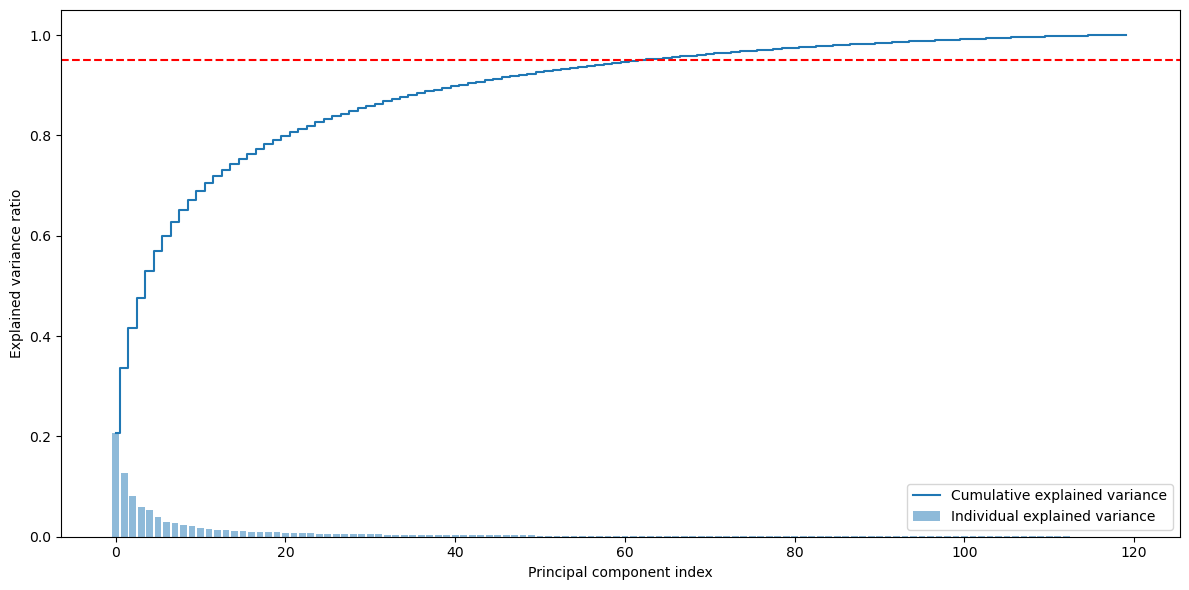

Number of PCA components needed to explain variance 95% : [64, 0.9514558774601826]


In [196]:
plot_eigen_values(var_exp=var_exp, threshold=0.95)

Ans -> Number of PCA components needed to explain variance 95% : [64, 0.9514558774601826]

11. Compute eigenvectors and show the first 10 eigenvectors as images

In [197]:
k = 10

In [198]:
eigenvectors_gram.shape

(120, 120)

In [199]:
# eigenface = x_hat_reshape.T @ eigenvectors_gram # eigenface
eigenface = eigenvectors_gram.T @ x_hat_reshape # eigenface


eigenface = eigenface / np.linalg.norm(eigenface, axis=1)[:, np.newaxis]
eigenface_img = np.reshape(eigenface, (120, 56,46))
print(eigenface.shape)
print(eigenface_img.shape)


(120, 2576)
(120, 56, 46)


In [200]:
eigenface

array([[-0.00770351, -0.00772669, -0.00711007, ..., -0.01241778,
        -0.01109845, -0.01264247],
       [-0.02931458, -0.02942605, -0.02967885, ...,  0.02284477,
         0.02638932,  0.02317165],
       [-0.04098371, -0.04057048, -0.04055009, ..., -0.01922964,
        -0.0249207 , -0.02342397],
       ...,
       [-0.00439552, -0.00096212,  0.00158714, ...,  0.05231193,
        -0.00184865, -0.03666005],
       [-0.00446886, -0.0006748 , -0.00746244, ...,  0.00733536,
        -0.00160989, -0.00954116],
       [-0.02217119, -0.01585856, -0.00238648, ...,  0.03002349,
         0.02394181,  0.02461826]])

In [201]:
def plot_image(data, row, column, title):
    fig = plt.figure(figsize=(12, 6)) 
  
    # setting values to rows and column variables 
    rows = row
    columns = column
    
    for i in range(len(data)):
        # Adds a subplot at the 1st position 
        fig.add_subplot(rows, columns, i+1) 
        
        # showing image 
        plt.imshow(data[i], cmap='gray') 
        plt.axis('off') 
        plt.title(f"{title} : {i}") 

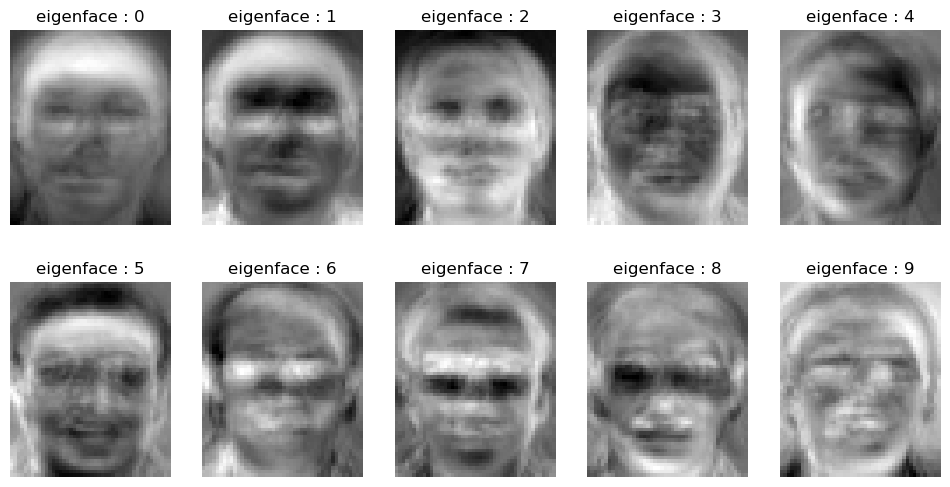

In [202]:
plot_image(data=eigenface_img[:k,:], row=2, column=5, title='eigenface')

12. From the image, what do you think the first eigenvector captures? What about the second
eigenvector?

Ans -> The first eigenvector captures the variation in the shape of the face and hairstyle, while the second eigenvector captures variations in more detailed features such as the eyes, forehead, and nose

So, the biggest variance is captured by the first eigenvector. which captures the most prominent features that that differentiate faces from one another.



13. Find the projection values of all images. keep k = 10

In [203]:
k = 10

In [204]:
projection = x_hat_reshape @ eigenface[:k,:].T
projection.shape

(120, 10)

14. Reconstruct the first image using this procedure. Use k = 10

In [205]:
eigenface.shape

(120, 2576)

In [206]:
eigenvectors_gram.shape

(120, 120)

(120, 56, 46)

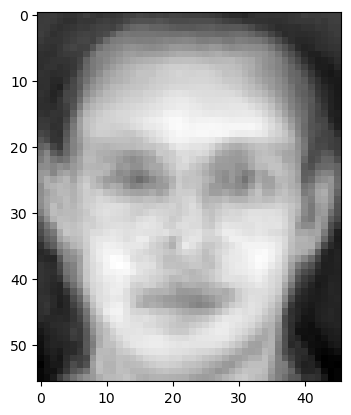

In [207]:
re_construct = projection @ eigenface[:k,:]  # (120, 2576)
re_construct = np.reshape(re_construct,(-1, 56, 46)) + mean_face
plt.imshow(re_construct[0], cmap='gray')
re_construct.shape

In [208]:
def calculate_mse(actual, pred):
    return np.mean((actual - pred)**2)

what is the MSE?

In [209]:
mse = calculate_mse(actual=x[0], pred= re_construct[0])
mse

0.0061483350164883025

Import PCA

In [210]:
from sklearn.decomposition import PCA

In [211]:
x_train = x.copy()
x_train = np.reshape(x_train, (x_train.shape[0], -1))

In [212]:
pca = PCA(n_components=10, random_state=0)
pca.fit(x_train)
compressed = pca.transform(x_train)

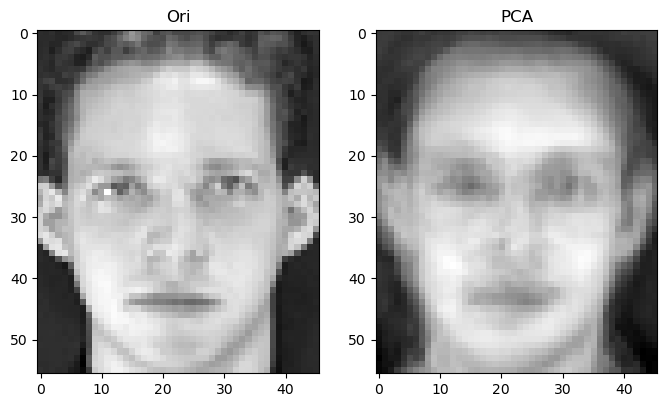

In [213]:
plt.figure(figsize=(8,6))
# plot original img
plt.subplot(1,2,1)
plt.title('Ori')
plt.imshow(x_train[0].reshape(56,46), cmap='gray')

# plot img from PCA
plt.subplot(1,2,2)
plt.title('PCA')
plt.imshow(pca.inverse_transform(compressed[0]).reshape(56,46), cmap='gray')


## CHAPTER 3

Linear Discriminant Analysis (LDA)

1. In order to assure that SW is invertible we need to make sure that SW is full rank. How many
PCA dimensions do we need to keep in order for SW to be full rank?

Ans -> Full rank of Sw is N-C where N is number of sample ,C is number of class. In summary should 120-40 = 80 PCA dimensions.

2. Using the answer to the previous question, project the original input to the PCA subspace.
Find the LDA projections

In [214]:
k = 80
nums_class = 40
img_per_cls = 3

In [215]:
eigenface.shape

(120, 2576)

In [216]:
# pca_projection = eigenface[:k,:] @ x_hat_reshape.T
pca_projection = x_hat_reshape @ eigenface[:k,:].T

# pca_projection = pca_projection.T

print(pca_projection.shape)

(120, 80)


mean of each class and global mean

In [217]:
mean_class = np.zeros((nums_class,k))
# m = np.zeros((nums_class,k))
for i in range(nums_class):
    mean_class[i] = np.sum(pca_projection[i* img_per_cls :(i* img_per_cls)+img_per_cls], axis=0)/img_per_cls
    # m[i] = np.mean(pca_projection[i:i+img_per_cls], axis=0)

mean_global = np.array([np.mean(pca_projection, axis=0)])


print(f'mean class shape: {mean_class.shape}')
print(f'mean global shape: {mean_global.shape}')


mean class shape: (40, 80)
mean global shape: (1, 80)


In [218]:
s_b = np.zeros((k, k))

for i in range(nums_class):
    # print(u_i.shape)
    # print((mean_class[i]-mean_global).shape)
    s_b = np.add(s_b, (mean_class[i]-mean_global).T @ (mean_class[i]-mean_global))

s_b.shape

(80, 80)

In [219]:
s_b

array([[ 4.59333238e+02, -1.54646623e+00, -3.49470193e+00, ...,
         7.07999422e-01, -1.24358888e-01,  4.00444275e-01],
       [-1.54646623e+00,  2.68819350e+02, -2.58319745e+00, ...,
         7.35237000e-01, -8.18106476e-03,  9.52924292e-01],
       [-3.49470193e+00, -2.58319745e+00,  1.63903819e+02, ...,
        -5.68866570e-01, -8.18413942e-01, -1.72163116e-01],
       ...,
       [ 7.07999422e-01,  7.35237000e-01, -5.68866570e-01, ...,
         2.98429320e-01,  1.88472237e-01,  3.26989245e-02],
       [-1.24358888e-01, -8.18106476e-03, -8.18413942e-01, ...,
         1.88472237e-01,  3.08184645e-01, -3.21356374e-02],
       [ 4.00444275e-01,  9.52924292e-01, -1.72163116e-01, ...,
         3.26989245e-02, -3.21356374e-02,  3.23155692e-01]])

In [220]:
s_w = np.zeros((k, k))

for c in range(0,len(pca_projection), img_per_cls):
    sum_within_class = np.zeros((k, k))
    for i in range(c,c+img_per_cls):
        # print(select_k_coms[i])
        x_norm = np.array([(pca_projection[i]-mean_class[int(c/3)])]).T

        sum_within_class = np.add(sum_within_class, x_norm @ x_norm.T)

    s_w += sum_within_class

s_w

array([[ 4.59300012e+01,  4.63939869e+00,  1.04841058e+01, ...,
        -2.12399827e+00,  3.73076664e-01, -1.20133282e+00],
       [ 4.63939869e+00,  6.89171283e+01,  7.74959234e+00, ...,
        -2.20571100e+00,  2.45431943e-02, -2.85877288e+00],
       [ 1.04841058e+01,  7.74959234e+00,  6.69129448e+01, ...,
         1.70659971e+00,  2.45524183e+00,  5.16489348e-01],
       ...,
       [-2.12399827e+00, -2.20571100e+00,  1.70659971e+00, ...,
         7.32831892e+00, -5.65416710e-01, -9.80967735e-02],
       [ 3.73076664e-01,  2.45431943e-02,  2.45524183e+00, ...,
        -5.65416710e-01,  7.06738059e+00,  9.64069122e-02],
       [-1.20133282e+00, -2.85877288e+00,  5.16489348e-01, ...,
        -9.80967735e-02,  9.64069122e-02,  6.90260778e+00]])

Find LDA projection

In [221]:
sw_inv_sb = np.linalg.inv(s_w) @ s_b

In [222]:
sw_inv_sb

array([[ 4.17137787e+06,  5.71680784e+05, -4.19108339e+05, ...,
         1.06305004e+04, -1.46324266e+04, -9.23593958e+03],
       [ 9.29924994e+05,  1.27737039e+05, -9.35001457e+04, ...,
         2.37036777e+03, -3.26158377e+03, -2.05942359e+03],
       [-1.06830424e+06, -1.46516526e+05,  1.07872298e+05, ...,
        -2.72270888e+03,  3.74864750e+03,  2.36609998e+03],
       ...,
       [ 1.84068690e+06,  2.52317643e+05, -1.84951888e+05, ...,
         4.69672262e+03, -6.45376421e+03, -4.07626619e+03],
       [-2.60707179e+06, -3.57248856e+05,  2.62024914e+05, ...,
        -6.64084767e+03,  9.15335414e+03,  5.77062542e+03],
       [-1.67063056e+06, -2.29008021e+05,  1.67905058e+05, ...,
        -4.25829419e+03,  5.85848857e+03,  3.70457205e+03]])

Is Inverse(Sw)*SB symmetric?

In [223]:
is_symmetruc = np.array_equal(sw_inv_sb, sw_inv_sb.T)
is_symmetruc

False

Can we still use 'numpy.linalg.eigh'

Ans -> No because Inverse(Sw)*SB not symmetric 

In [224]:
eigenvalues_lda, eigenvectors_lda = np.linalg.eig(sw_inv_sb)

In [225]:
eigenvalues_lda = eigenvalues_lda.real
eigenvectors_lda = eigenvectors_lda.real
eigenvectors_lda

array([[-1.08283080e-01,  6.60692383e-02,  1.25589047e-02, ...,
        -1.13795848e-03, -1.13795848e-03,  2.55700751e-04],
       [-2.41412268e-02,  3.65676262e-02,  4.29753889e-02, ...,
        -2.13386360e-03, -2.13386360e-03,  4.81540558e-03],
       [ 2.77386565e-02,  2.21391363e-02, -1.48314066e-01, ...,
        -6.06708354e-03, -6.06708354e-03,  7.70461394e-03],
       ...,
       [-4.77958897e-02, -3.08236852e-02, -7.74990054e-03, ...,
        -3.11509942e-01, -3.11509942e-01,  2.64804380e-02],
       [ 6.76806249e-02, -3.55533682e-02,  5.46540700e-03, ...,
        -2.75679475e-01, -2.75679475e-01, -2.73059566e-02],
       [ 4.33703329e-02, -2.51736390e-02, -2.42510118e-02, ...,
         1.93650514e-01,  1.93650514e-01,  2.30737420e-01]])

Sort decrease order

In [226]:
sorted_eig  = np.argsort(-eigenvalues_lda)
eigenvalues_lda = eigenvalues_lda[sorted_eig]
eigenvectors_lda = eigenvectors_lda[:, sorted_eig]

How many non-zero eigenvalues are there?

In [227]:
eigenvalues_lda, eigenvectors_lda = Non_zero_eigenvalue(eigenvalues_lda, eigenvectors_lda, 1e-6)

39 [13691749.400935136, 4935.978101275709, 1443.8461748289915, 748.1873519967314, 574.4690709675212, 387.18368987160005, 248.0516639426429, 171.9068413245, 126.58506148073573, 106.60749134960349, 76.70883632038722, 72.2738617146684, 37.89277246796972, 32.6640504024358, 31.833125529829523, 24.929186823702363, 23.2673579456174, 17.2583143762909, 14.305663810233968, 12.504633529537186, 10.706335324082048, 9.500221455135277, 8.027100204872836, 6.571924750046851, 5.6401157397863475, 4.792272409217836, 4.475436617001677, 4.0910385988289555, 3.559188800227508, 2.5376662447490426, 2.227277171274772, 1.8703520362747077, 1.6156672110878196, 1.501863793964719, 1.0863325986376866, 0.79359855585965, 0.7122753056723741, 0.5012124586727392, 0.35010137643381617, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Ans -> 39

3. Plot the first 10 LDA eigenvectors as images (the 10 best projections).

In [228]:
eigenvectors_lda.shape

(80, 80)

In [229]:
eigenface.shape

(120, 2576)

In [230]:
convert_to_ori = eigenface[:k,:].T @ eigenvectors_lda
convert_to_ori = convert_to_ori.T
convert_to_ori.shape

(80, 2576)

In [231]:
convert_to_ori[0]

array([ 0.02849807,  0.02538512,  0.02415002, ..., -0.01357828,
        0.00348065,  0.0119007 ])

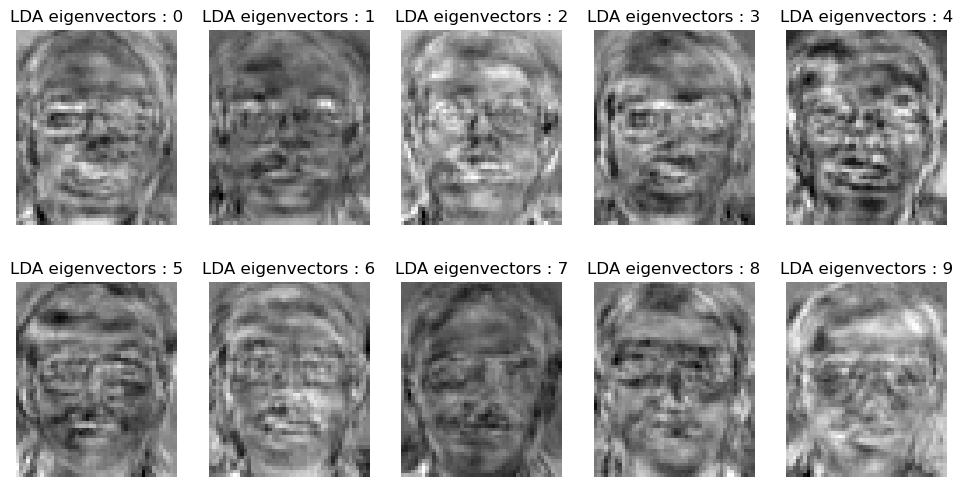

In [232]:
plot_image(data = convert_to_ori[:10,:].reshape((-1,56,46)), row=2, column=5, title='LDA eigenvectors')

4. The combined PCA+LDA projection procedure is called fisherface.

In [233]:
fisher = eigenvectors_lda[:39,:] @ eigenface[:k,:]
fisher.shape


(39, 2576)

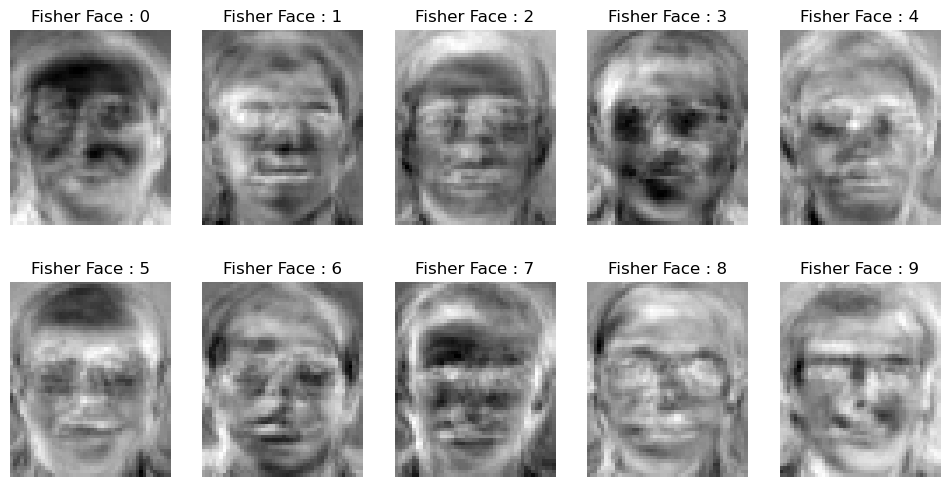

In [234]:
plot_image(data = fisher[:10,:].reshape((-1,56,46)), row=2, column=5, title='Fisher Face')

15. Plot the RoC of all three experiments

Data

In [235]:
x_reshape = np.reshape(x,(x.shape[0],-1))
y_reshape = np.reshape(y,(y.shape[0],-1))

print(x_reshape.shape)
print(y_reshape.shape)

proj_x_pca = x_reshape @ eigenface.T
proj_y_pca = y_reshape @ eigenface.T

print(proj_x_pca.shape)
print(proj_y_pca.shape)

proj_x_lda = x_reshape @ fisher.T
proj_y_lda = y_reshape @ fisher.T

print(proj_x_lda.shape)
print(proj_y_lda.shape)

(120, 2576)
(280, 2576)
(120, 120)
(280, 120)
(120, 39)
(280, 39)


In [236]:
sim_matrix_ori = Similarity_matrix(x_reshape, y_reshape)
tpr_ori, fpr_ori = generate_roc_curve(sim_matrix_ori, min_thres, max_thres)
print(f'True positive rate original data : {sum(tpr_ori)/len(tpr_ori)}')
print(f'False positive rate original data: {sum(fpr_ori)/len(fpr_ori)}')


True positive rate original data : 0.7414464285714282
False positive rate original data: 0.45928031135531155


In [237]:
sim_matrix_pca = Similarity_matrix(proj_x_pca, proj_y_pca)
tpr_pca, fpr_pca = generate_roc_curve(sim_matrix_pca, min_thres, max_thres)
print(f'True positive rate PCA : {sum(tpr_pca)/len(tpr_pca)}')
print(f'False positive rate PCA: {sum(fpr_pca)/len(fpr_pca)}')


True positive rate PCA : 0.8107928571428573
False positive rate PCA: 0.49664148351648346


In [238]:
sim_matrix_lda = Similarity_matrix(proj_x_lda, proj_y_lda)
tpr_lda, fpr_lda = generate_roc_curve(sim_matrix_lda, min_thres, max_thres)
print(f'True positive rate fisher : {sum(tpr_lda)/len(tpr_lda)}')
print(f'False positive rate fisher: {sum(fpr_lda)/len(fpr_lda)}')

True positive rate fisher : 0.9310642857142857
False positive rate fisher: 0.7100281135531138


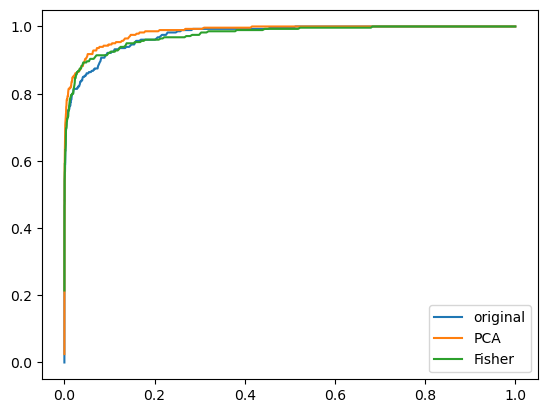

In [239]:
plt.plot(fpr_ori, tpr_ori, label='original')
plt.plot(fpr_pca, tpr_pca, label='PCA')
plt.plot(fpr_lda, tpr_lda, label='Fisher')
plt.legend()

Ans -> Fisher is better than others because high true positive rate with 0.93, Next PCA that have 0.81 and last original feature have  0.74